# Create dummy dataset

active subreddit (categorical)   values (categorical)   succesful (binary)

In [48]:
import pandas as pd
import random

# Define the possible inputs for each column
active_subreddits = ['subreddit1', 'subreddit2', 'subreddit3', 'subreddit4', 'subreddit5',
                     'subreddit6', 'subreddit7', 'subreddit8', 'subreddit9', 'subreddit10']

values = ['value1', 'value2', 'value3', 'value4', 'value5', 'value6', 'value7', 'value8', 'value9',
          'value10', 'value11', 'value12', 'value13', 'value14', 'value15', 'value16', 'value17',
          'value18', 'value19', 'value20']

# Create an empty list to store the rows
rows = []

# Generate 100 rows
for _ in range(100):
    active_subreddit = random.choice(active_subreddits)
    value = random.choice(values)
    successful = random.choice([True, False])
    rows.append({'active_subreddit': active_subreddit, 'values': value, 'successful': successful})

# Create the DataFrame
df = pd.DataFrame(rows)

# Print the resulting DataFrame
print(df)


   active_subreddit   values  successful
0        subreddit1  value14       False
1       subreddit10   value3       False
2        subreddit1  value10       False
3        subreddit8   value5        True
4        subreddit7   value6        True
..              ...      ...         ...
95       subreddit9   value4        True
96       subreddit2  value18        True
97       subreddit8   value1       False
98       subreddit3  value19       False
99      subreddit10  value13        True

[100 rows x 3 columns]


# Descriptive

### Set colors

In [49]:
import matplotlib.pyplot as plt

# Define a custom color palette
color_palette = plt.get_cmap('tab20')

### Frequency of value per category

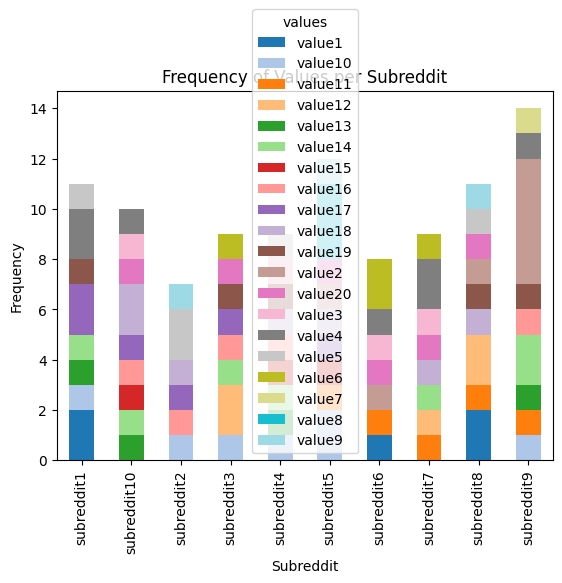

In [50]:

# Count the frequency of values per subreddit
value_counts = df.groupby(['active_subreddit', 'values']).size().unstack(fill_value=0)

# Plot the frequency of values per subreddit
value_counts.plot(kind='bar', stacked=True, colormap=color_palette)

# Set the plot title and axis labels
plt.title('Frequency of Values per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Frequency')

# Display the plot
plt.show()

### Percentage of value per category

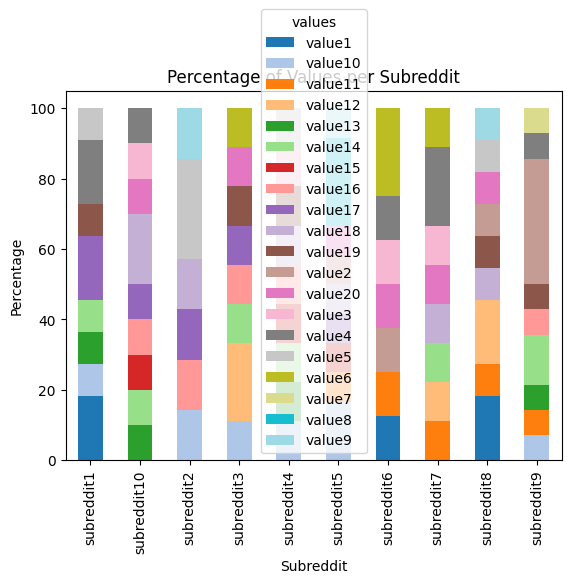

In [51]:
# Calculate the percentage of values per subreddit
value_percentages = df.groupby('active_subreddit')['values'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plot the percentages of values per subreddit
value_percentages.plot(kind='bar', stacked=True, colormap=color_palette)

# Set the plot title and axis labels
plt.title('Percentage of Values per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Percentage')

# Display the plot
plt.show()


### Frequency of value per succesful or not per category


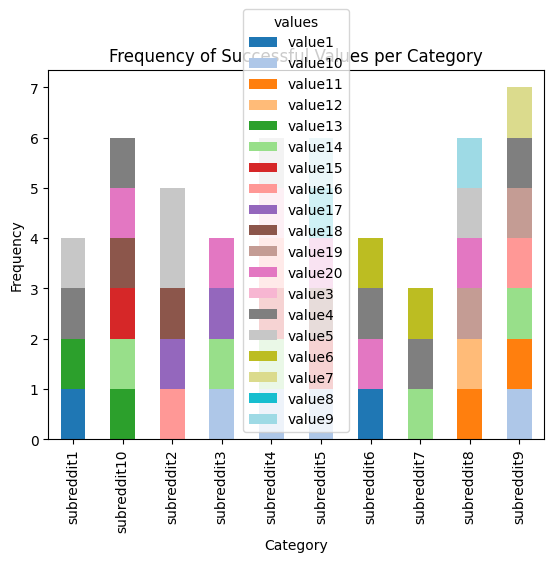

In [52]:
# Group the DataFrame by 'active_subreddit' and 'values', and count the frequency of successful values
success_counts = df[df['successful']].groupby(['active_subreddit', 'values']).size().unstack(fill_value=0)

# Plot the frequency of successful values per category
success_counts.plot(kind='bar', stacked=True, colormap=color_palette)

# Set the plot title and axis labels
plt.title('Frequency of Successful Values per Category')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### Percentage of values that are succesful per category

ValueError: 'value2' is not in list

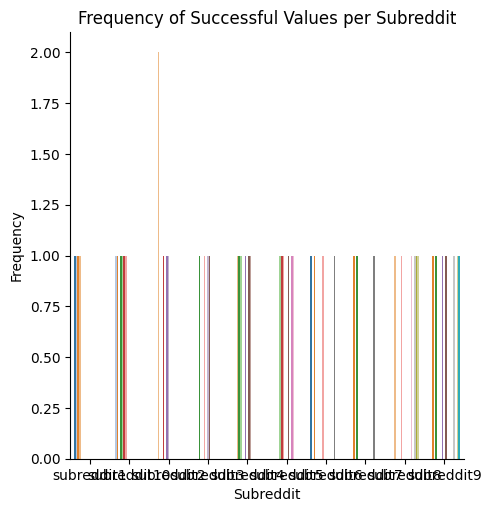

In [53]:
import seaborn as sns

# Filter the DataFrame to include only successful values
successful_df = df[df['successful']]

# Group the filtered DataFrame by 'active_subreddit' and 'values' columns and count the frequency
success_counts = successful_df.groupby(['active_subreddit', 'values']).size().reset_index(name='frequency')

sns_color_palette = sns.color_palette("tab20")

# Plot the grouped bar plot
sns.catplot(x='active_subreddit', y='frequency', hue='values', data=success_counts, kind='bar', legend=False, palette=sns_color_palette)

# Set the plot title and axis labels
plt.title('Frequency of Successful Values per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Frequency')

# Get the unique values of the 'values' column and sort them alphabetically
unique_values = sorted(df['values'].unique())

# Create a new handles and labels list in alphabetical order for the legend
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles = [handles[labels.index(value)] for value in unique_values]
sorted_labels = [label for label in unique_values]

# Set the legend in alphabetical order
plt.legend(sorted_handles, sorted_labels, title='Values')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Inferential

The results of the chi-square test provide information about the association between successful values and subreddits. Specifically, the test helps determine if the distribution of (successful) values differs significantly across different subreddits.

The chi-square statistic measures the overall difference between the observed frequencies and the expected frequencies under the assumption of independence. A higher chi-square value indicates a larger deviation from the expected frequencies, suggesting a stronger association between the variables.

The p-value associated with the chi-square statistic indicates the statistical significance of the observed association. A small p-value (typically below a predetermined significance level, such as 0.05) suggests that the observed association is unlikely to have occurred by chance alone. In other words, a small p-value indicates that there is evidence of a significant relationship between successful values and subreddits.

Interpreting the results:

If the chi-square statistic is large and the p-value is small (below the significance level), it suggests that there is a statistically significant association between successful values and subreddits. The variables are likely dependent on each other, and the distribution of successful values differs across subreddits.

If the chi-square statistic is small and the p-value is large (above the significance level), it suggests that there is no strong evidence of an association between successful values and subreddits. The variables may be independent, and any observed differences in the distribution of successful values could be due to random chance.

### Chi square over distribution of values

In [ ]:
from scipy.stats import chisquare

# Group the DataFrame by 'active_subreddit' and 'values', and count the frequency
value_counts = df.groupby(['active_subreddit', 'values']).size().unstack(fill_value=0)

# Calculate the chi-square statistic and p-value
chi2, p_value = chisquare(value_counts, axis=None)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 195.96
P-value: 0.5476382696306195


### Chi square over distribution of succesful values

In [ ]:
# Filter the DataFrame to include only successful values
successful_df = df[df['successful']]

# Group the filtered DataFrame by 'active_subreddit' and 'values', and count the frequency
value_counts = successful_df.groupby(['active_subreddit', 'values']).size().unstack(fill_value=0)

# Calculate the chi-square statistic and p-value
chi2, p_value = chisquare(value_counts, axis=None)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 213.6138927369879
P-value: 0.22706332288866682


# Correlation

Correlation Matrix:
           value1   value10   value11   value12   value13   value14   value15   
value1   1.000000 -0.062941 -0.052632 -0.052632 -0.046829 -0.062941 -0.040346  \
value10 -0.062941  1.000000 -0.062941 -0.062941 -0.056002 -0.075269 -0.048248   
value11 -0.052632 -0.062941  1.000000 -0.052632 -0.046829 -0.062941 -0.040346   
value12 -0.052632 -0.062941 -0.052632  1.000000 -0.046829 -0.062941 -0.040346   
value13 -0.046829 -0.056002 -0.046829 -0.046829  1.000000 -0.056002 -0.035898   
value14 -0.062941 -0.075269 -0.062941 -0.062941 -0.056002  1.000000 -0.048248   
value15 -0.040346 -0.048248 -0.040346 -0.040346 -0.035898 -0.048248  1.000000   
value16 -0.052632 -0.062941 -0.052632 -0.052632 -0.046829 -0.062941 -0.040346   
value17 -0.057961 -0.069314 -0.057961 -0.057961 -0.051571 -0.069314 -0.044431   
value18 -0.062941 -0.075269 -0.062941 -0.062941 -0.056002 -0.075269 -0.048248   
value19 -0.052632 -0.062941 -0.052632 -0.052632 -0.046829 -0.062941 -0.040346   
value2  

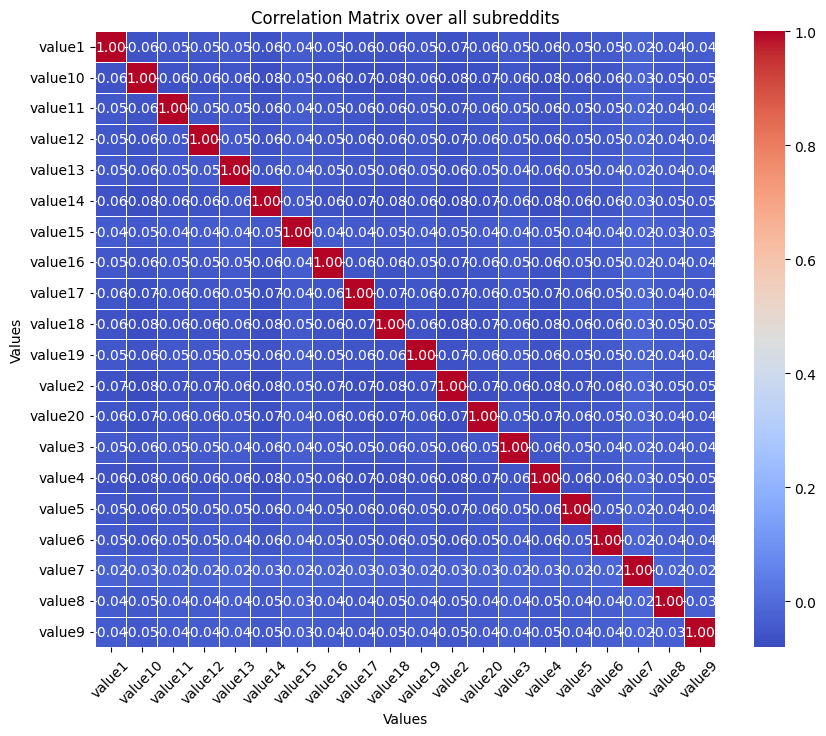

In [54]:
# correlation efficient between pairs of values: expressed together or mutually exclusive?

# Calculate the correlation coefficient between pairs of values
correlation_matrix = df['values'].str.get_dummies().corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix over all subreddits')
plt.xlabel('Values')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

